In [143]:
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#import plotly.offline as pyoff
#import plotly.graph_objs as go

In [83]:
df = pd.read_csv('orders.csv',encoding = "ISO-8859-1")

In [85]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_date'].unique()

array(['2014-09-07T00:00:00.000000000', '2014-07-08T00:00:00.000000000',
       '2014-03-14T00:00:00.000000000', ...,
       '2017-12-06T00:00:00.000000000', '2017-07-26T00:00:00.000000000',
       '2017-01-13T00:00:00.000000000'], dtype='datetime64[ns]')

In [86]:
df['InvoiceYearMonth'] = df['order_date'].map(lambda date: 100*date.year + date.month)
df['InvoiceDate'] = pd.to_datetime(df['order_date'])
df['Revenue'] = df['sales']

In [87]:
# дата присоединения = когорта
df_fp = df.groupby('customer_id').InvoiceYearMonth.min().reset_index()
df_fp.columns = ['customer_id', 'FirstInvoice']

In [88]:
df = pd.merge(df, df_fp, how='inner', on='customer_id')

In [212]:
# месяц после присоединения
df['month_no'] = (df.InvoiceYearMonth//100-df.FirstInvoice//100)*12+(df.InvoiceYearMonth%100-df.FirstInvoice%100)%12

In [213]:
df[['InvoiceYearMonth','FirstInvoice','month_no']].head()

,InvoiceYearMonth,FirstInvoice,month_no
0,201409,201409,0
1,201512,201409,15
2,201512,201409,15
3,201707,201409,46
4,201712,201409,39


In [158]:
# смотрим тех кто присоединился в 16-17 годах
df_plot = df[df.FirstInvoice>201600]


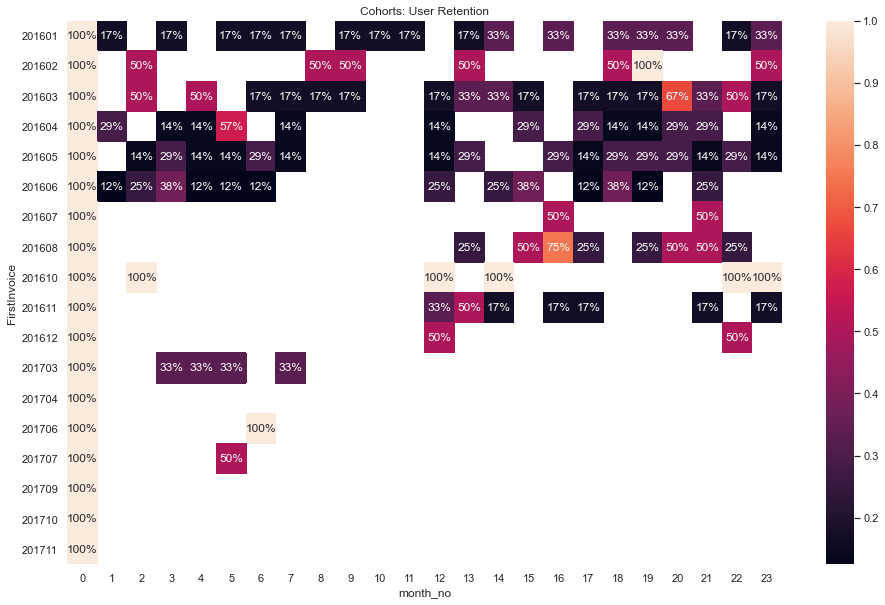

In [159]:
cohorts_group = df_plot.groupby(['FirstInvoice', 'month_no']).agg({'customer_id': pd.Series.nunique,'id': pd.Series.nunique})
cohorts_group.rename(columns={'customer_id': 'TotalUsers',
'id': 'TotalOrders'}, inplace=True)
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
# cohorts_group.set_index(['FirstInvoice', 'month_no'], inplace=True)
# cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalUsers'].unstack(0).divide(cohort_group_size, axis=1)


cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()

sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.0%');

по графикам видно что действительно когорты >201607 перестали заказывать в следующие месяцы но вернулись через год, 

так как данные у нас есть только до 201712 то не можем сказать что пользователи присоединившиеся в 2017 к нам не вернутся в 2018 году, 

однако - интересно посмотреть почему 201607 пользователи перестали пользоваться сервисом в течении первого года

In [205]:
 cohorts_group['TotalRevenue'].unstack(0).divide(cohort_group_size, axis=0)

FirstInvoice             201601  201602    201603    201604     201605  \
FirstInvoice month_no                                                    
201601       0         2855.250  46.544  1378.778  2839.494  12542.823   
             1          623.960     NaN       NaN   115.385        NaN   
             3           41.568     NaN       NaN   292.796   1625.240   
             5           23.616     NaN       NaN   911.704    100.496   
             6           20.936     NaN   143.240       NaN   2952.616   
...                         ...     ...       ...       ...        ...   
201707       0         2855.250  46.544  1378.778  2839.494  12542.823   
             5           23.616     NaN       NaN   911.704    100.496   
201709       0         2855.250  46.544  1378.778  2839.494  12542.823   
201710       0         2855.250  46.544  1378.778  2839.494  12542.823   
201711       0         2855.250  46.544  1378.778  2839.494  12542.823   

FirstInvoice             201606  201607    201608  201610  201611   201612  \
FirstInvoice month_no                                                        
201601       0         1812.268  109.63  1985.214   98.16  584.84  2674.33   
             1          911.256     NaN       NaN     NaN     NaN      NaN   
             3          434.004     NaN       NaN     NaN     NaN      NaN   
             5         1489.724     NaN       NaN     NaN     NaN      NaN   
             6           11.232     NaN       NaN     NaN     NaN      NaN   
...                         ...     ...       ...     ...     ...      ...   
201707       0         1812.268  109.63  1985.214   98.16  584.84  2674.33   
             5         1489.724     NaN       NaN     NaN     NaN      NaN   
201709       0         1812.268  109.63  1985.214   98.16  584.84  2674.33   
201710       0         1812.268  109.63  1985.214   98.16  584.84  2674.33   
201711       0         1812.268  109.63  1985.214   98.16  584.84  2674.33   

FirstInvoice            201703  201704  201706    201707   201709    201710  \
FirstInvoice month_no                                                         
201601       0         485.050  16.739  47.976  1370.068  1038.26  1593.528   
             1             NaN     NaN     NaN       NaN      NaN       NaN   
             3           6.370     NaN     NaN       NaN      NaN       NaN   
             5         210.008     NaN     NaN   238.684      NaN       NaN   
             6             NaN     NaN  65.856       NaN      NaN       NaN   
...                        ...     ...     ...       ...      ...       ...   
201707       0         485.050  16.739  47.976  1370.068  1038.26  1593.528   
             5         210.008     NaN     NaN   238.684      NaN       NaN   
201709       0         485.050  16.739  47.976  1370.068  1038.26  1593.528   
201710       0         485.050  16.739  47.976  1370.068  1038.26  1593.528   
201711       0         485.050  16.739  47.976  1370.068  1038.26  1593.528   

FirstInvoice             201711  
FirstInvoice month_no            
201601       0         1205.584  
             1              NaN  
             3              NaN  
             5              NaN  
             6              NaN  
...                         ...  
201707       0         1205.584  
             5              NaN  
201709       0         1205.584  
201710       0         1205.584  
201711       0         1205.584  

[130 rows x 18 columns]

 cohorts_group['TotalRevenue'].unstack(0)

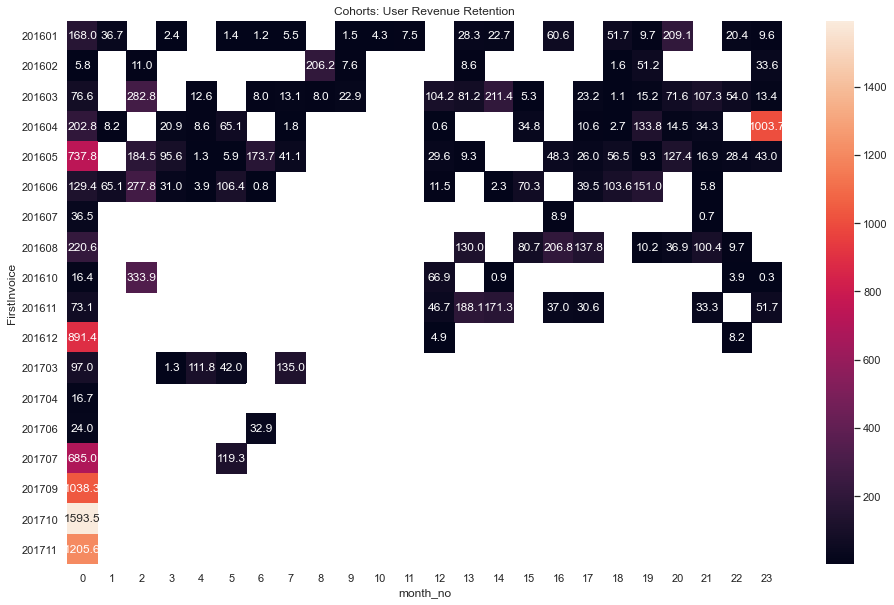

In [211]:
cohorts_group = df_plot.groupby(['FirstInvoice', 'month_no']).agg({'customer_id': pd.Series.nunique,'id': pd.Series.nunique, 'Revenue': sum})
cohorts_group.rename(columns={'customer_id': 'TotalUsers',
'Revenue': 'TotalRevenue','id': 'TotalOrders'}, inplace=True)
cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).count()
# cohorts_group.set_index(['FirstInvoice', 'month_no'], inplace=True)
# cohort_group_size = cohorts_group['TotalUsers'].groupby(level=0).first()
user_retention = cohorts_group['TotalRevenue'].unstack(0).divide(cohort_group_size, axis=1)

sns.set(style='white')
plt.figure(figsize=(16, 10))
plt.title('Cohorts: User Revenue Retention')
sns.heatmap(user_retention.T, mask=user_retention.T.isnull(), annot=True, fmt='.1f');

посмотрим среднюю выручку на 1 заказ по когортам, 

тут видно что значимого изменения 201607 не произошло, то есть гипотеза о том что люди стали закупаться надолго не подтвердилась, 

однако можно заметить что последние 4 когорты закупились на очень большие суммы, что может говорить о изменении пользовательского поведения, 

однако причины изменения мне не ясны

Итог:
    стоит обратить внимание на период 201607 тк в этот момент произошло измение пользовательской возвращаемости
    а так же на причины измения средней Revenue чтобы акцентировать внимание на данном улучшении